In [1]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt

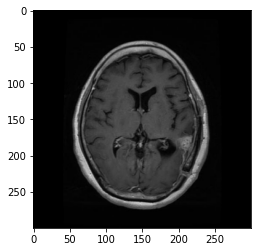

In [5]:
# Resolution
path = '/Users/james/MScCode/Final Project/Datasets/test_dataset_unprocessed'

saved = np.load(os.path.join(path,'features.npy'))

plt.imshow(saved[0].reshape(300,300,3))

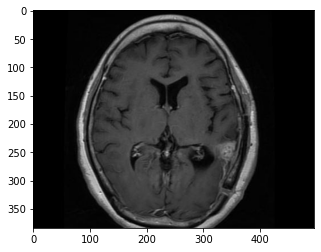

In [12]:
# Cropping
img = cv2.imread('/Users/james/MScCode/Final Project/Datasets/test_dataset_unprocessed/Te-gl_0019.jpg')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to binary
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

# Find the non-zero pixels
coords = np.column_stack(np.where(thresh > 10))

# Find the bounding box of the non-zero pixels
x, y, w, h = cv2.boundingRect(coords)

# Crop the image
cropped_img = img[y: y + h, x: x + w]

plt.imshow(cropped_img)

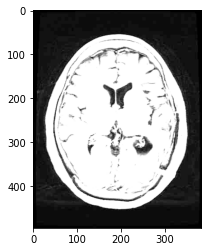

In [15]:
from PIL import Image, ImageEnhance

# Open the image
im = Image.open('/Users/james/MScCode/Final Project/Datasets/test_dataset_unprocessed/Te-gl_0019.jpg')

# Create an ImageEnhance object for the brightness
enhancer = ImageEnhance.Brightness(cropped_im)

# Set the enhancement factor to 0.5 (darken the image by 50%)
im = enhancer.enhance(6)

plt.imshow(im)

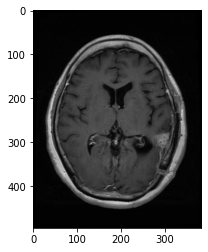

In [14]:
# Cropping with Pillow
from PIL import Image

# Open the image
# im = Image.open("/Users/james/MScCode/Final Project/Datasets/test_dataset/Te-gl_0019.jpg")

# # Convert the image to grayscale
# im = im.convert("L")

# Find the bounding box of the non-black regions
bbox = im.getbbox()

# Crop the image to the bounding box
cropped_im = im.crop(bbox)

# Save the cropped image
# cropped_im.save("cropped_image.jpg")

plt.imshow(cropped_im)

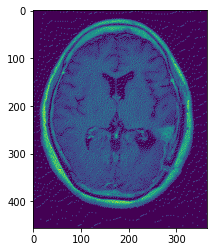

In [16]:
# Cropping Andy method

# Get the darkness of a pixel, if pixel is very dark then set to black
im = Image.open("/Users/james/MScCode/Final Project/Datasets/test_dataset_unprocessed/Te-gl_0019.jpg")
im = im.convert('1') # convert image to black and white
# image_file.save('result.png')
im = im.convert("L")

bbox = im.getbbox()

# Crop the image to the bounding box
cropped_im = im.crop(bbox)

# Save the cropped image
# cropped_im.save("cropped_image.jpg")

plt.imshow(cropped_im)

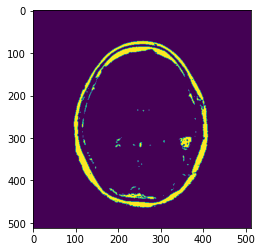

In [20]:
THRESHOLD_VALUE = 100

#Load image and convert to greyscale
img = Image.open("/Users/james/MScCode/Final Project/Datasets/test_dataset_unprocessed/Te-gl_0019.jpg")
img = img.convert("L")

imgData = np.asarray(img)
thresholdedData = (imgData > THRESHOLD_VALUE) * 1.0

plt.imshow(thresholdedData)

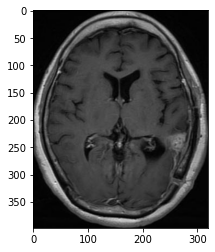

In [54]:
# Pixel loop
img_org = Image.open("/Users/james/MScCode/Final Project/Datasets/test_dataset_unprocessed/Te-gl_0019.jpg")
img = img_org.convert("L")
pixels = img.load() # create the pixel map

for i in range(img.size[0]): # for every pixel:
    for j in range(img.size[1]):
        if pixels[i,j] != (25):
            # change to black if not red
            pixels[i,j] = (0)
            
bbox = img.getbbox()

cropped_im = img_org.crop(bbox)

# Save the cropped image
# cropped_im.save("cropped_image.jpg")

plt.imshow(cropped_im)